In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import tensorflow as tf
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [56]:
# On utilise la bibliothèque pandas pour lire un fichier CSV
#On utilise df.head()'pour afficher les cinq premières ligne afin de vérifier rapidement le contenu et la structure des données dans le fichier Facial Emotion Data

data = pd.read_csv("./House_Rent_Dataset.csv")
data.head()


,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [57]:
#quelle que statistique :
print("Mean Rent : ",data.Rent.mean())
print("Median Rent : ",data.Rent.median())
print("Highest Rent : ",data.Rent.max())
print("Lowest Rent : ",data.Rent.min())


Mean Rent :  34993.45132743363
Median Rent :  16000.0
Highest Rent :  3500000
Lowest Rent :  1200


In [58]:
cities=data["City"].value_counts()
cities

Mumbai       972
Chennai      891
Bangalore    886
Hyderabad    868
Delhi        605
Kolkata      524
Name: City, dtype: int64

In [59]:
#On supprime la colonne 'Posted On' car le prix de la location de doit pas dependre du prprietaire
data.drop(columns='Posted On', inplace = True)
data

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,3 out of 5,Carpet Area,Bandam Kommu,Hyderabad,Semi-Furnished,Bachelors/Family,2,Contact Owner
4742,3,29000,2000,1 out of 4,Super Area,"Manikonda, Hyderabad",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Owner
4743,3,35000,1750,3 out of 5,Carpet Area,"Himayath Nagar, NH 7",Hyderabad,Semi-Furnished,Bachelors/Family,3,Contact Agent
4744,3,45000,1500,23 out of 34,Carpet Area,Gachibowli,Hyderabad,Semi-Furnished,Family,2,Contact Agent


<AxesSubplot: xlabel='City', ylabel='Rent'>

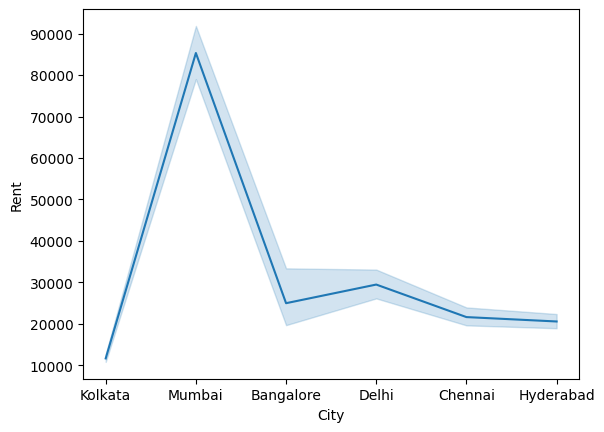

In [60]:
sns.lineplot(x=data["City"], y=data['Rent'])

In [61]:
objects = data.select_dtypes(include='object').columns
for i in range(0,len(objects)):
    print(data[objects[i]].value_counts())
    print('*************************************************')

1 out of 2         379
Ground out of 2    350
2 out of 3         312
2 out of 4         308
1 out of 3         293
                  ... 
11 out of 31         1
50 out of 75         1
18 out of 26         1
12 out of 27         1
23 out of 34         1
Name: Floor, Length: 480, dtype: int64
*************************************************
Super Area     2446
Carpet Area    2298
Built Area        2
Name: Area Type, dtype: int64
*************************************************
Bandra West                                37
Gachibowli                                 29
Electronic City                            24
Velachery                                  22
Miyapur, NH 9                              22
                                           ..
Kengeri Upanagara                           1
Ittamadu, Banashankari, Outer Ring Road     1
Rmv Extension, Armane Nagar                 1
snv la                                      1
Manikonda, Hyderabad                        1
Name: Area L

In [52]:
data.dtypes

BHK                   int64
Rent                  int64
Size                  int64
Floor                object
Area Type            object
Area Locality        object
City                 object
Furnishing Status    object
Tenant Preferred     object
Bathroom              int64
Point of Contact     object
dtype: object

In [63]:
# Pour chaque colonne de type "objet", le code utilise la méthode "fit_transform" de l'objet "le" pour remplacer les valeurs de chaque colonne par des valeurs codées en étiquettes (des entiers). Les données transformées sont stockées dans la même colonne.
le = preprocessing.LabelEncoder()

for i in range(0,len(objects)):
    data[objects[i]] = le.fit_transform(data[objects[i]])

In [64]:
data.dtypes

BHK                  int64
Rent                 int64
Size                 int64
Floor                int32
Area Type            int32
Area Locality        int32
City                 int32
Furnishing Status    int32
Tenant Preferred     int32
Bathroom             int64
Point of Contact     int32
dtype: object

In [30]:
#On s'interrese aux maisons dont le prix de location est inferieur a 110000
data.drop(data[(data['Rent'] > 110000)].index, inplace=True)
data

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2,10000,1100,455,2,221,4,2,1,2,2
1,2,20000,800,14,2,1527,4,1,1,1,2
2,2,17000,1000,14,2,1760,4,1,1,1,2
3,2,10000,800,10,2,526,4,2,1,1,2
4,2,7500,850,10,1,1890,4,2,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,271,1,219,3,1,1,2,2
4742,3,29000,2000,16,2,1214,3,1,1,3,2
4743,3,35000,1750,271,1,724,3,1,1,3,0
4744,3,45000,1500,226,1,590,3,1,2,2,0


In [31]:
X = data.drop(columns=['Rent'])
y = data['Rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=44, shuffle =True)

In [32]:
# RandomForestRegressor
RandomForestRegressorModel = RandomForestRegressor(n_estimators=500,max_depth=7, random_state=33)
RandomForestRegressorModel.fit(X_train, y_train)

print('Random Forest Regressor Train Score is : ' , RandomForestRegressorModel.score(X_train, y_train))
print('Random Forest Regressor Test Score is : ' , RandomForestRegressorModel.score(X_test, y_test))

Random Forest Regressor Train Score is :  0.8365589407547825
Random Forest Regressor Test Score is :  0.800286565769965


In [33]:
# GradientBoostingRegressor
GBRModel = GradientBoostingRegressor(n_estimators=200,max_depth=5,learning_rate = 0.03,random_state=44)
GBRModel.fit(X_train, y_train)

print('GBRModel Train Score is : ' , GBRModel.score(X_train, y_train))
print('GBRModel Test Score is : ' , GBRModel.score(X_test, y_test))

GBRModel Train Score is :  0.8681255140224488
GBRModel Test Score is :  0.8111432009018987


In [34]:
#DecisionTreeRegressor
tree_model=DecisionTreeRegressor()
tree_model.fit(X_train,y_train)

print("Decision Tree Training Accuracy:", tree_model.score(X_train,y_train))
print("Decision Tree Testing Accuracy:", tree_model.score(X_test,y_test))

Decision Tree Training Accuracy: 0.999991251956159
Decision Tree Testing Accuracy: 0.6072591645882505
